# Import

In [28]:
import os
import numpy as np
import pandas as pd
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set
%matplotlib inline

# Load the dataset

Head
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
_____________________________________________________________________________
Shape
(1000, 2)
_____________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
review       1000 non-null object
sentiment    1000 non-null object
dtypes: object(2)
memory usage: 15.8+ KB
None


,review,sentiment
count,1000,1000
unique,1000,2
top,Bela Lugosi appeared in several of these low b...,positive
freq,1,501


Head
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
_____________________________________________________________________________
Shape
(1000, 2)
_____________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
review       1000 non-null object
sentiment    1000 non-null object
dtypes: object(2)
memory usage: 15.8+ KB
None


,review,sentiment
count,1000,1000
unique,1000,2
top,Bela Lugosi appeared in several of these low b...,positive
freq,1,501


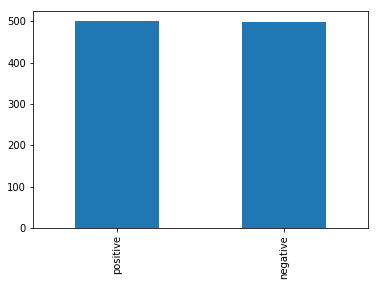

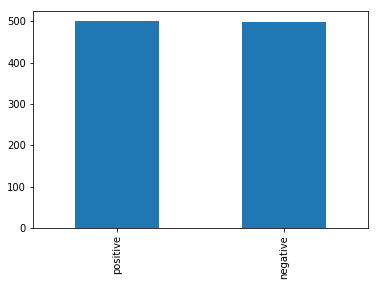

In [29]:
imdb_data=pd.read_csv('IMDBDataset.csv')

df_train=imdb_data[:1000]

print("Head")
print(df_train.head())
print("_____________________________________________________________________________")
print("Shape")
print(df_train.shape)
print("_____________________________________________________________________________")
print(df_train.info())

df_train['sentiment'].value_counts().plot(kind='bar');
df_train.describe()

The data is clean, there is no Naan values

# Preprocessing

## Tokenizing

Creation of a tokenize's function permitting to automatically tokenize our train and test set

In [30]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def tokenize(data):
    corpus = [word_tokenize(token) for token in data]
    lowercase_train = [[token.lower() for token in doc] for doc in corpus]
    alphas = [[token for token in doc if token.isalpha()] for doc in lowercase_train]
    stop_words = stopwords.words('english')
    train_no_stop = [[token for token in doc if token not in stop_words] for doc in alphas]
    stemmer = PorterStemmer()
    stemmed = [[stemmer.stem(token) for token in doc] for doc in train_no_stop]
    train_clean_str = [ ' '.join(doc) for doc in stemmed]
    return train_clean_str

In [31]:
X_train=imdb_data.review[:1000]
y_train=imdb_data.sentiment[:1000]

X_train = tokenize(X_train)

X_test2=imdb_data.review[40000:45000]
y_test2=imdb_data.sentiment[40000:45000]

X_test2 = tokenize(X_test2)
y_test2 = y_test2.values.tolist()

X_train[1]

'wonder littl product br br film techniqu fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

'wonder littl product br br film techniqu fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

# Machine Learning

## Preprocessing

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english')

## Machine learning models

### MultinomialNB

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
pipe = Pipeline([('vectorizer', cvec), ('mnb', mnb)])

y_train=y_train.values.tolist()
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


cm = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_pred, y_train)

print(cm)
print("Accuracy :" , accuracy)

cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()

cr = classification_report(y_train, y_pred)
print(cr, cv)

[[499   0]
 [ 21 480]]
Accuracy : 0.979
[[499   0]
 [ 21 480]]
Accuracy : 0.979
              precision    recall  f1-score   support

    negative       0.96      1.00      0.98       499
    positive       1.00      0.96      0.98       501

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000
 0.7708844058257185
              precision    recall  f1-score   support

    negative       0.96      1.00      0.98       499
    positive       1.00      0.96      0.98       501

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000
 0.7708844058257185


# Semi Supervised 

In [35]:
iterasi=1
acc_train=[]
acc_test=[]
acc_test2=[]

seed=1.10
data_total=len(X_train)
data_iter=int(seed*data_total)

In [36]:

print(data_total)
print(data_iter)


y_pred_fromtrain=pipe.predict(X_train)
cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
cr = classification_report(y_pred_fromtrain, y_train)
cm = confusion_matrix(y_train, y_pred_fromtrain)
accuracy = accuracy_score(y_pred_fromtrain, y_train)
acc_train.append(accuracy)
print("\nTrain Data=",len(X_train),len(y_train))
print("Predicton from train data model ke-",iterasi)
print("\nCross validation score:",cv,"\n",cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")


X_test=imdb_data.review[data_total:data_iter]
y_test=imdb_data.sentiment[data_total:data_iter]

pipe.fit(X_train,y_train)

print("Train Data=",len(X_train),len(y_train))
print("Test Data=",len(X_test),len(y_test))

y_test=y_test.values.tolist()
X_test=tokenize(X_test)
y_pred=pipe.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)
acc_test.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")





iterasi=iterasi+1


for i in range (0,len(X_test)) :
        if y_pred[i] != y_test[i] :
            X=X_test[i]
            y=y_test[i]
            X_train.append(X)
            y_train.append(y)
        
print(len(X_train),len(y_train))

data_total=data_iter
data_iter=int(seed*data_total)

1000
1100
1000
1100

Train Data= 1000 1000
Predicton from train data model ke- 1

Cross validation score: 0.7708844058257185 
               precision    recall  f1-score   support

    negative       1.00      0.96      0.98       520
    positive       0.96      1.00      0.98       480

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000


Confusion Matrix : 
 [[499   0]
 [ 21 480]]
Accuracy : 0.979
__________________________________________________________________________________________________
Train Data= 1000 1000
Test Data= 100 100

Train Data= 1000 1000
Predicton from train data model ke- 1

Cross validation score: 0.7708844058257185 
               precision    recall  f1-score   support

    negative       1.00      0.96      0.98       520
    positive       0.96      1.00      0.98       480

   micro avg       0.98      0.98      0.98      1000
   macro avg       

In [37]:
while data_total < 10000 :

    print(data_total,data_iter,len(X_train))


    y_pred_fromtrain=pipe.predict(X_train)
    cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
    cr = classification_report(y_pred_fromtrain, y_train)
    cm = confusion_matrix(y_train, y_pred_fromtrain)
    accuracy = accuracy_score(y_pred_fromtrain, y_train)
    acc_train.append(accuracy)
    print("\nTrain Data=",len(X_train),len(y_train))
    print("Predicton from train data model ke-",iterasi)
    print("\nCross validation score:",cv,"\n",cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")


    X_test=imdb_data.review[data_total:data_iter]
    y_test=imdb_data.sentiment[data_total:data_iter]

    pipe.fit(X_train,y_train)

    print("Train Data=",len(X_train),len(y_train))
    print("Test Data=",len(X_test),len(y_test))

    y_test=y_test.values.tolist()
    X_test=tokenize(X_test)
    y_pred=pipe.predict(X_test)

    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_pred, y_test)
    acc_test.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")
    
    y_pred_fromtest2=pipe.predict(X_test2)
    cr = classification_report(y_test2, y_pred_fromtest2)
    cm = confusion_matrix(y_test2, y_pred_fromtest2)
    accuracy = accuracy_score(y_pred_fromtest2, y_test2)
    acc_test2.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")





    iterasi=iterasi+1
    
    for i in range (0,len(X_test)) :
        if y_pred[i] != y_test[i] :
             if (data_total+i) < 10000:
                X=X_test[i]
                y=y_test[i]
                X_train.append(X)
                y_train.append(y)

    print(len(X_train),len(y_train))
    
    data_total=data_iter
    data_iter=int(seed*data_total)

1100 1210 1021
1100 1210 1021

Train Data= 1021 1021
Predicton from train data model ke- 2

Cross validation score: 0.7550300576933091 
               precision    recall  f1-score   support

    negative       0.98      0.94      0.96       532
    positive       0.94      0.98      0.96       489

   micro avg       0.96      0.96      0.96      1021
   macro avg       0.96      0.96      0.96      1021
weighted avg       0.96      0.96      0.96      1021


Confusion Matrix : 
 [[499   9]
 [ 33 480]]
Accuracy : 0.9588638589618022
__________________________________________________________________________________________________
Train Data= 1021 1021
Test Data= 110 110

Train Data= 1021 1021
Predicton from train data model ke- 2

Cross validation score: 0.7550300576933091 
               precision    recall  f1-score   support

    negative       0.98      0.94      0.96       532
    positive       0.94      0.98      0.96       489

   micro avg       0.96      0.96      0.96      1

prediction from test data, model ke- 4
              precision    recall  f1-score   support

    negative       0.80      0.85      0.82        60
    positive       0.87      0.82      0.85        73

   micro avg       0.83      0.83      0.83       133
   macro avg       0.83      0.84      0.83       133
weighted avg       0.84      0.83      0.83       133


Confusion Matrix : 
 [[51  9]
 [13 60]]
Accuracy : 0.8345864661654135
__________________________________________________________________________________________________
prediction from test data, model ke- 4
              precision    recall  f1-score   support

    negative       0.80      0.85      0.82        60
    positive       0.87      0.82      0.85        73

   micro avg       0.83      0.83      0.83       133
   macro avg       0.83      0.84      0.83       133
weighted avg       0.84      0.83      0.83       133


Confusion Matrix : 
 [[51  9]
 [13 60]]
Accuracy : 0.8345864661654135
___________________________

prediction from test data, model ke- 6
              precision    recall  f1-score   support

    negative       0.80      0.80      0.80      2463
    positive       0.81      0.80      0.81      2537

   micro avg       0.80      0.80      0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000


Confusion Matrix : 
 [[1981  482]
 [ 501 2036]]
Accuracy : 0.8034
__________________________________________________________________________________________________
1135 1135
1771 1948 1135

Train Data= 1135 1135
Predicton from train data model ke- 7

Cross validation score: 0.6843838542375933 
               precision    recall  f1-score   support

    negative       0.97      0.93      0.95       575
    positive       0.93      0.97      0.95       560

   micro avg       0.95      0.95      0.95      1135
   macro avg       0.95      0.95      0.95      1135
weighted avg       0.95      0.95      0.95      1135


Confusio

prediction from test data, model ke- 9
              precision    recall  f1-score   support

    negative       0.78      0.75      0.76       102
    positive       0.78      0.80      0.79       112

   micro avg       0.78      0.78      0.78       214
   macro avg       0.78      0.77      0.77       214
weighted avg       0.78      0.78      0.78       214


Confusion Matrix : 
 [[76 26]
 [22 90]]
Accuracy : 0.7757009345794392
__________________________________________________________________________________________________
prediction from test data, model ke- 9
              precision    recall  f1-score   support

    negative       0.78      0.75      0.76       102
    positive       0.78      0.80      0.79       112

   micro avg       0.78      0.78      0.78       214
   macro avg       0.78      0.77      0.77       214
weighted avg       0.78      0.78      0.78       214


Confusion Matrix : 
 [[76 26]
 [22 90]]
Accuracy : 0.7757009345794392
___________________________

prediction from test data, model ke- 11
              precision    recall  f1-score   support

    negative       0.79      0.81      0.80      2463
    positive       0.81      0.79      0.80      2537

   micro avg       0.80      0.80      0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000


Confusion Matrix : 
 [[2004  459]
 [ 533 2004]]
Accuracy : 0.8016
__________________________________________________________________________________________________
1354 1354
2850 3135 1354

Train Data= 1354 1354
Predicton from train data model ke- 12

Cross validation score: 0.5721640800343557 
               precision    recall  f1-score   support

    negative       0.95      0.92      0.94       684
    positive       0.92      0.95      0.94       670

   micro avg       0.94      0.94      0.94      1354
   macro avg       0.94      0.94      0.94      1354
weighted avg       0.94      0.94      0.94      1354


Confus

Train Data= 1457 1457
Test Data= 344 344
Train Data= 1457 1457
Test Data= 344 344
prediction from test data, model ke- 14
              precision    recall  f1-score   support

    negative       0.77      0.86      0.81       174
    positive       0.83      0.74      0.78       170

   micro avg       0.80      0.80      0.80       344
   macro avg       0.80      0.80      0.80       344
weighted avg       0.80      0.80      0.80       344


Confusion Matrix : 
 [[149  25]
 [ 45 125]]
Accuracy : 0.7965116279069767
__________________________________________________________________________________________________
prediction from test data, model ke- 14
              precision    recall  f1-score   support

    negative       0.77      0.86      0.81       174
    positive       0.83      0.74      0.78       170

   micro avg       0.80      0.80      0.80       344
   macro avg       0.80      0.80      0.80       344
weighted avg       0.80      0.80      0.80       344


Confusion

prediction from test data, model ke- 16
              precision    recall  f1-score   support

    negative       0.79      0.82      0.81      2463
    positive       0.82      0.79      0.81      2537

   micro avg       0.81      0.81      0.81      5000
   macro avg       0.81      0.81      0.81      5000
weighted avg       0.81      0.81      0.81      5000


Confusion Matrix : 
 [[2020  443]
 [ 527 2010]]
Accuracy : 0.806
__________________________________________________________________________________________________
1686 1686
4588 5046 1686

Train Data= 1686 1686
Predicton from train data model ke- 17

Cross validation score: 0.4583563278687066 
               precision    recall  f1-score   support

    negative       0.94      0.90      0.92       861
    positive       0.90      0.94      0.92       825

   micro avg       0.92      0.92      0.92      1686
   macro avg       0.92      0.92      0.92      1686
weighted avg       0.92      0.92      0.92      1686


Confusi

Train Data= 1867 1867
Test Data= 555 555
Train Data= 1867 1867
Test Data= 555 555
prediction from test data, model ke- 19
              precision    recall  f1-score   support

    negative       0.82      0.85      0.83       277
    positive       0.85      0.81      0.83       278

   micro avg       0.83      0.83      0.83       555
   macro avg       0.83      0.83      0.83       555
weighted avg       0.83      0.83      0.83       555


Confusion Matrix : 
 [[236  41]
 [ 53 225]]
Accuracy : 0.8306306306306306
__________________________________________________________________________________________________
prediction from test data, model ke- 19
              precision    recall  f1-score   support

    negative       0.82      0.85      0.83       277
    positive       0.85      0.81      0.83       278

   micro avg       0.83      0.83      0.83       555
   macro avg       0.83      0.83      0.83       555
weighted avg       0.83      0.83      0.83       555


Confusion

prediction from test data, model ke- 21
              precision    recall  f1-score   support

    negative       0.81      0.81      0.81      2463
    positive       0.82      0.81      0.82      2537

   micro avg       0.81      0.81      0.81      5000
   macro avg       0.81      0.81      0.81      5000
weighted avg       0.81      0.81      0.81      5000


Confusion Matrix : 
 [[2002  461]
 [ 472 2065]]
Accuracy : 0.8134
__________________________________________________________________________________________________
2161 2161
7386 8124 2161

Train Data= 2161 2161
Predicton from train data model ke- 22

Cross validation score: 0.3733036278435432 
               precision    recall  f1-score   support

    negative       0.92      0.91      0.91      1058
    positive       0.92      0.92      0.92      1103

   micro avg       0.92      0.92      0.92      2161
   macro avg       0.92      0.92      0.92      2161
weighted avg       0.92      0.92      0.92      2161


Confus

Train Data= 2441 2441
Test Data= 893 893
Train Data= 2441 2441
Test Data= 893 893
prediction from test data, model ke- 24
              precision    recall  f1-score   support

    negative       0.79      0.79      0.79       446
    positive       0.79      0.79      0.79       447

   micro avg       0.79      0.79      0.79       893
   macro avg       0.79      0.79      0.79       893
weighted avg       0.79      0.79      0.79       893


Confusion Matrix : 
 [[352  94]
 [ 92 355]]
Accuracy : 0.7917133258678611
__________________________________________________________________________________________________
prediction from test data, model ke- 24
              precision    recall  f1-score   support

    negative       0.79      0.79      0.79       446
    positive       0.79      0.79      0.79       447

   micro avg       0.79      0.79      0.79       893
   macro avg       0.79      0.79      0.79       893
weighted avg       0.79      0.79      0.79       893


Confusion

In [38]:
print("Fnal Model")

pipe.fit(X_train,y_train)

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")




len(X_train)

Fnal Model
Fnal Model
prediction from test data, model ke- 26
              precision    recall  f1-score   support

    negative       0.82      0.83      0.82      2463
    positive       0.83      0.82      0.83      2537

   micro avg       0.83      0.83      0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000


Confusion Matrix : 
 [[2051  412]
 [ 459 2078]]
Accuracy : 0.8258
__________________________________________________________________________________________________


2662

prediction from test data, model ke- 26
              precision    recall  f1-score   support

    negative       0.82      0.83      0.82      2463
    positive       0.83      0.82      0.83      2537

   micro avg       0.83      0.83      0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000


Confusion Matrix : 
 [[2051  412]
 [ 459 2078]]
Accuracy : 0.8258
__________________________________________________________________________________________________


2662

# Test

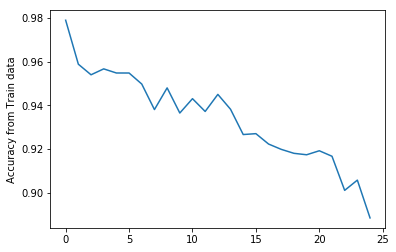

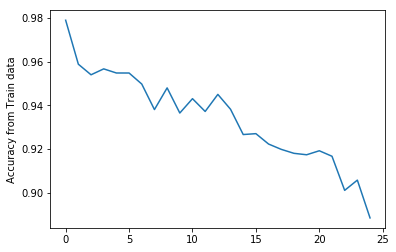

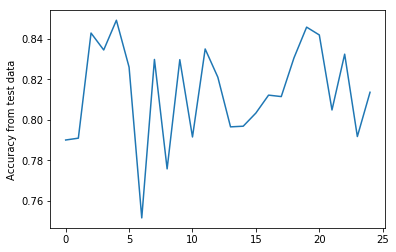

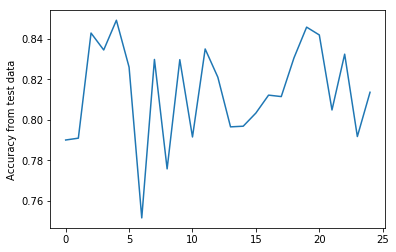

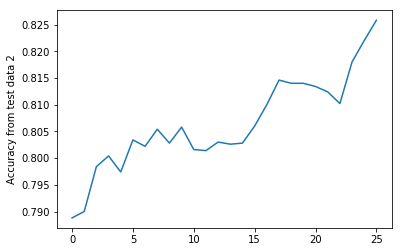

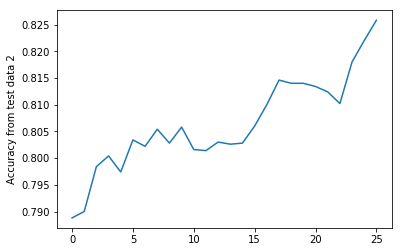

In [39]:
plt.plot(acc_train)
plt.ylabel('Accuracy from Train data')
plt.show()

plt.plot(acc_test)
plt.ylabel('Accuracy from test data')
plt.show()

plt.plot(acc_test2)
plt.ylabel('Accuracy from test data 2')
plt.show()

In [40]:
len(y_train)

2662

2662